# DryBeenClassification

# Index

- <a href='#1' > 1.Data Batches for Training </a>

In [1]:
#import Important liabraries
import pandas as pd
import numpy as np
import pymongo

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#  <a id='1'> 1.Data Batching for training </a>

In [38]:

def dataProcess(data):
    #Read Downloaded dataset
    df = pd.read_excel(data)

    #findin the shape of dataset
    print("original dataset shape::::",df.shape)

    #use sklearn model to split dataset into training and test
    train_data, test_data = train_test_split(df, test_size=0.20, random_state=42)

    #splotting train_data into train and validation datasets seperatly
    train2, val = train_test_split(train_data, test_size=0.20, random_state=42)

    print("Training dataset new shape and length :::", train2.shape)
    print("Testing dataset new shape and length :::", test_data.shape)
    print("Validation dataset new shape and length :::", val.shape)

    #Data Transformation
    #'dict', 'list', 'series', 'split', 'records', 'index' 
    #convet all datasets in to dictionary for insertion into mongodb.
    train_data = train2.to_dict(orient='records')
    test_data = test_data.to_dict(orient='records')
    val_data=val.to_dict(orient='records')

    print("converted data into dictionary format...>>>>>")
    return (train_data, test_data, val_data)
#Calling function
train, test, val = dataProcess('Dry_Bean_Dataset.xlsx')


original dataset shape:::: (13611, 17)
Training dataset new shape and length ::: (8710, 17)
Testing dataset new shape and length ::: (2723, 17)
Validation dataset new shape and length ::: (2178, 17)
converted data into dictionary format...>>>>>


In [39]:
print(len(train))
print(len(test))
print(len(val))

8710
2723
2178


In [40]:
def mongoDB(train, test, val):
    #import datasets into Mongo-db

    #create connection to mongodb local host at ipadd:27017
    myclient = pymongo.MongoClient('mongodb://localhost:27017/')

    #create database in mongo db
    mydb = myclient['project080422']

    #create collections in mydb databases
    mycol_train = mydb['train_data']
    mycol_test = mydb['test_data']
    mycol_val = mydb['validation_data']

    #Insert data into collection
    train = mycol_train.insert_many(train)
    test = mycol_test.insert_many(test)
    val = mycol_val.insert_many(val)
    print("all data is inserted into Mongodb database>>>>>>>>>>>>..")

mongoDB(train, test, val)

all data is inserted into Mongodb database>>>>>>>>>>>>..


## Export data from database to CSV for training

In [9]:
#printing list of databased present in mongodb
print(myclient.list_database_names())

['Images', 'MachineLearning', 'WebScraching', 'admin', 'config', 'database', 'local', 'project080422', 'shubhamdata']


In [8]:
#printing list of of collections presert in respected databse (project080422).
print(mydb.list_collection_names())

['test_data', 'train_data', 'validation_data']


In [46]:
def exportdata(dbname,colname):
#create connection to mongodb local host at ipadd:27017
    myclient = pymongo.MongoClient('mongodb://localhost:27017/')
    print(myclient.list_database_names())
    
    #connect to database in mongo db
    mydb = myclient[dbname]
    print(mydb.list_collection_names())
    
    allrecords = mydb[colname].find()
    list_courser = list(allrecords)
    
    #creating dataframe from fetched data from database and droping "_id " columns from database.
    df = pd.DataFrame(list_courser).drop('_id',axis=1)

    #converting this dataframe to .csv file for better training.
    df.to_csv(f"{colname}.csv")
    
    print(f"{colname} file data is downloaded from batabase and converted CSV>.....>>>>>>>>>>")


exportdata('project080422','validation_data')

['Images', 'MachineLearning', 'WebScraching', 'admin', 'config', 'database', 'local', 'project080422', 'shubhamdata']
['train_data', 'test_data', 'validation_data']
validation_data file data is downloaded from batabase and converted CSV>.....>>>>>>>>>>


## Reading data form csv file

In [2]:
#Reading data form csv file
train_data = pd.read_csv('Train_data.csv').drop('Unnamed: 0', axis=1)
test_data = pd.read_csv('Test_data.csv').drop('Unnamed: 0', axis=1)
test_data = pd.read_csv('validation_data.csv').drop('Unnamed: 0', axis=1)

## Data preprocessing

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8710 entries, 0 to 8709
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8710 non-null   int64  
 1   Perimeter        8710 non-null   float64
 2   MajorAxisLength  8710 non-null   float64
 3   MinorAxisLength  8710 non-null   float64
 4   AspectRation     8710 non-null   float64
 5   Eccentricity     8710 non-null   float64
 6   ConvexArea       8710 non-null   int64  
 7   EquivDiameter    8710 non-null   float64
 8   Extent           8710 non-null   float64
 9   Solidity         8710 non-null   float64
 10  roundness        8710 non-null   float64
 11  Compactness      8710 non-null   float64
 12  ShapeFactor1     8710 non-null   float64
 13  ShapeFactor2     8710 non-null   float64
 14  ShapeFactor3     8710 non-null   float64
 15  ShapeFactor4     8710 non-null   float64
 16  Class            8710 non-null   object 
dtypes: float64(14)

In [4]:
train_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,62716,937.448,356.992788,224.568972,1.589680,0.777359,63313,282.581831,0.775037,0.990571,0.896796,0.791562,0.005692,0.001378,0.626570,0.996046,CALI
1,30917,646.018,233.942038,168.648659,1.387156,0.693040,31312,198.405512,0.778883,0.987385,0.930932,0.848097,0.007567,0.002415,0.719268,0.997738,DERMASON
2,37278,737.864,281.747347,168.833859,1.668785,0.800571,37788,217.861937,0.773435,0.986504,0.860419,0.773253,0.007558,0.001667,0.597920,0.997800,DERMASON
3,28351,616.298,228.588375,158.106545,1.445787,0.722219,28625,189.993722,0.719751,0.990428,0.937987,0.831161,0.008063,0.002374,0.690828,0.998791,DERMASON
4,31332,652.039,232.492875,172.153364,1.350499,0.672092,31758,199.732675,0.763004,0.986586,0.926085,0.859092,0.007420,0.002493,0.738038,0.996720,DERMASON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,37622,712.941,253.893294,189.220878,1.341783,0.666755,38017,218.864840,0.777571,0.989610,0.930132,0.862035,0.006749,0.002299,0.743104,0.997084,DERMASON
8706,55647,948.511,376.993422,188.895593,1.995777,0.865414,56332,266.180317,0.709584,0.987840,0.777261,0.706061,0.006775,0.001039,0.498522,0.994939,HOROZ
8707,45564,802.744,296.073697,196.340281,1.507962,0.748489,46120,240.860720,0.746461,0.987944,0.888541,0.813516,0.006498,0.001756,0.661808,0.997982,BARBUNYA
8708,79140,1105.067,382.072161,264.967830,1.441957,0.720455,80482,317.433737,0.755730,0.983325,0.814383,0.830821,0.004828,0.001419,0.690264,0.995331,BARBUNYA


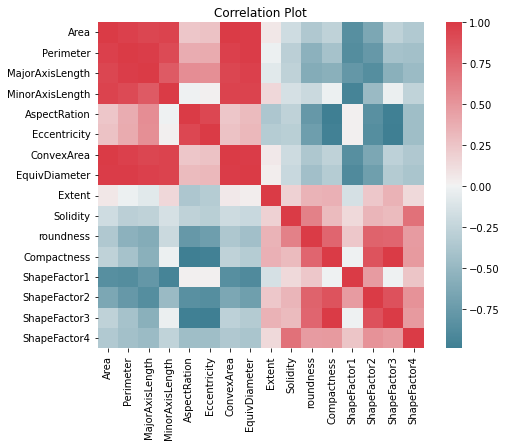

In [5]:
# Ploting correlation plot for know correlation between features of data.

cor= train_data.corr(method='pearson')
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Scaling data using StandardScaler

In [6]:
#Call the sklearn librart and import scaler values
from sklearn.preprocessing import StandardScaler

In [7]:
#call Standardscaler 
std_scaler = StandardScaler()

train_data_Scale = train_data
#fit valuse to function
train_data_Scale[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = std_scaler.fit_transform(train_data_Scale[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

In [8]:
train_data_Scale.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03,8.710000e+03
mean,9.115683e-17,6.016364e-18,-3.243100e-16,-3.164056e-16,2.638022e-16,9.547153e-17,7.284644e-17,2.053658e-16,-9.405412e-16,3.220208e-15,-7.507134e-16,-7.402294e-16,2.741222e-16,9.811006e-17,4.128475e-16,-6.179392e-15
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-1.108573e+00,-1.534722e+00,-1.586260e+00,-1.764073e+00,-2.269649e+00,-5.792700e+00,-1.107450e+00,-1.542812e+00,-3.986991e+00,-1.467465e+01,-6.452955e+00,-2.519232e+00,-3.341250e+00,-1.934271e+00,-2.307588e+00,-1.092797e+01
25%,-5.726121e-01,-7.083763e-01,-7.785456e-01,-5.925453e-01,-6.124208e-01,-3.816121e-01,-5.748214e-01,-6.445369e-01,-6.325439e-01,-3.196685e-01,-6.829573e-01,-6.093194e-01,-5.865364e-01,-9.479632e-01,-6.317305e-01,-3.115581e-01
50%,-2.877848e-01,-2.844971e-01,-2.776726e-01,-2.185254e-01,-1.297084e-01,1.466764e-01,-2.901972e-01,-2.482374e-01,1.974035e-01,2.403053e-01,1.721540e-01,2.102311e-02,7.402184e-02,-2.226916e-02,-1.731370e-02,3.058632e-01
75%,2.865749e-01,5.748040e-01,6.560986e-01,3.234721e-01,5.079770e-01,6.508184e-01,2.913417e-01,4.505251e-01,7.597692e-01,6.132338e-01,7.324290e-01,5.566772e-01,6.339487e-01,7.625741e-01,5.287258e-01,6.455401e-01
max,6.861962e+00,5.264803e+00,4.882899e+00,5.712034e+00,3.289383e+00,1.717316e+00,7.027254e+00,5.329029e+00,2.394698e+00,1.620963e+00,1.918256e+00,3.044606e+00,3.422991e+00,3.264354e+00,3.352972e+00,1.065825e+00


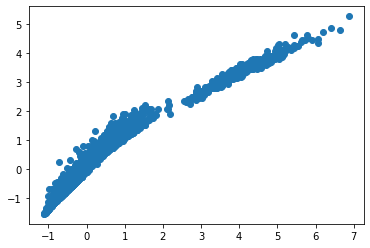

In [9]:
plt.scatter(train_data_Scale['Area'],train_data_Scale[ 'Perimeter'])
plt.show()

In [10]:
len(train_data["Class"].unique())

7

## Data Clustering

In [11]:
#Importing KMeans for clustering
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=7, init='k-means++')
km= km.fit(train_data_Scale[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

In [13]:
train_data_Scale['Clusters'] = km.labels_

In [14]:
train_data_Scale.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Clusters
0,0.330912,0.386530,0.433875,0.495376,0.032255,0.291966,0.322093,0.500201,0.523431,0.733752,0.387430,-0.140419,-0.772249,-0.572536,-0.177576,0.216201,CALI,6
1,-0.751323,-0.970132,-0.999753,-0.742657,-0.793135,-0.626813,-0.751045,-0.917106,0.602389,0.045553,0.960892,0.779499,0.880266,1.166401,0.762340,0.606074,DERMASON,0
2,-0.534835,-0.542571,-0.442787,-0.738557,0.354647,0.544892,-0.533876,-0.589511,0.490536,-0.144853,-0.223697,-0.438334,0.872534,-0.088780,-0.468073,0.620389,DERMASON,5
3,-0.838653,-1.108484,-1.062127,-0.976051,-0.554184,-0.308867,-0.841153,-1.058738,-0.611467,0.702922,1.079409,0.503923,1.317531,1.097331,0.473973,0.848791,DERMASON,0
4,-0.737199,-0.942103,-1.016637,-0.665065,-0.942534,-0.855065,-0.736089,-0.894760,0.276420,-0.127050,0.879464,0.958400,0.751141,1.298062,0.952659,0.371536,DERMASON,0


In [15]:
train_data_Scale.Clusters.unique()

array([6, 0, 5, 4, 2, 3, 1])

## Get best model of each cluster

In [16]:
def optimal_k_means(data, max_k):
    means =[]
    inertias =[]
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate Elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

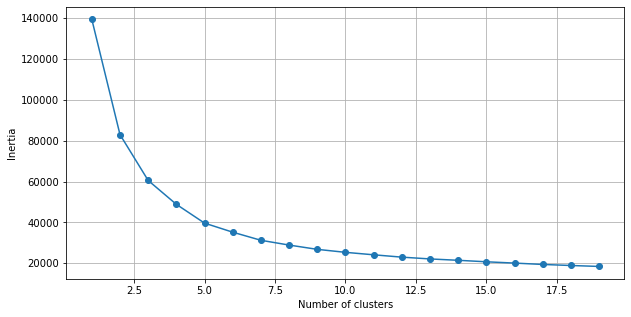

In [17]:
optimal_k_means(train_data_Scale[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']], 20)

## Model selection usig RandomForestClassifier

In [18]:
#defining Model
from sklearn.ensemble import RandomForestClassifier


In [19]:
X_train = train_data_Scale.drop(['Class','Clusters'], axis=1)
y_train = train_data_Scale['Class']

In [20]:
#Scale train data also before giving to model
#call Standardscaler 
std_scaler = StandardScaler()

test_data_Scale = test_data
#fit valuse to function
test_data_Scale[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = std_scaler.fit_transform(test_data_Scale[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])

X_test = test_data.drop('Class', axis=1)
y_test = test_data["Class"]

In [21]:
#Defining the model and finding it best parameters

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
forest_clf.score(X_test,y_test)

0.9214876033057852

## HyperParameter Tuning 

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = { 
    'n_estimators': [20,30,40,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [24]:
CV_rfc = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 30, 40, 50, 100]})

In [25]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [26]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50)

In [27]:
# cvres = CV_rfc.cv_results_
# for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
#     print(np.sqrt(-mean_score), params)
    

In [34]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=8, criterion='entropy')

In [35]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=42)

In [36]:
rfc1.score(X_test,y_test)

0.9173553719008265

In [37]:
pred=rfc1.predict(X_test)
pred

array(['DERMASON', 'DERMASON', 'SEKER', ..., 'HOROZ', 'BOMBAY',
       'DERMASON'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9173553719008265


# Saving Model 

In [40]:
# importting  pickle library
import pickle

In [41]:
#here we are converting our model to binary fiel using pickle lib as model.pkl
pickle.dump(rfc1, open('model.pkl', 'wb'))